# Sustainable Energy for All

Sustainable energy is power from natural resources like the sun, wind, and water that can provide energy without depleting the Earth's resources or harming future generations. It specifically considers the long-term economic, environmental, and social impacts to ensure that energy needs are met both now and in the future. This is why we are going to analyse China, India and USA historical data related to key performance indicators from 1990 to 2016 in order to preview their sustainable future.

Key questions:
---
1. How do primary energy intensity levels have been developing?
2. How does the forecast look for 2030?
3. How Cooking Technologies had affected its performance?



In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings

## Loading & Data Cleanning
---

You can download .csv file in: <br>

https://databank.worldbank.org/source/sustainable-energy-for-all

In [22]:
# CSV to dataframe
dfSE=pd.read_csv("c8af4998-3aa0-4d79-9215-033c6814116c_Data.csv")
display(dfSE)

,Country Name,Country Code,Time,Time Code,Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY],Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT],Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY],Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION],Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC],Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT],Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM],Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT],Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL],Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT],Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN]
0,China,CHN,2016.0,YR2016,..,..,..,..,..,..,..,59.26,100.000000,100.000000,100.0
1,China,CHN,2015.0,YR2015,6.69006970167277,1398321,23.926817173663,9084482,12.4133525698911,5844158,73183146.5259,58.54,100.000000,100.000000,100.0
2,China,CHN,2014.0,YR2014,7.10422000054532,1280977,22.6091537829535,8744472,12.2238230065824,5665745,71536310.655768,57.8,99.996687,99.998489,100.0
3,China,CHN,2013.0,YR2013,7.85133380344517,1103418,20.2962273802567,8275653,11.8381669000852,5436567,69906541.019796,57.24,99.963948,99.983116,100.0
4,China,CHN,2012.0,YR2012,8.19029944077663,995264,19.9662489377563,8069989,11.9685670286267,4984731,67426526.339352,56.4,99.826197,99.916382,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Data from database: Sustainable Energy for All,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
dfSE.set_index("Country Code",inplace=True)
dfSE2=dfSE.iloc[:-5]
display(dfSE2.tail())

,Country Name,Time,Time Code,Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY],Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT],Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY],Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION],Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC],Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT],Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM],Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT],Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL],Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT],Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN]
Country Code,,,,,,,,,,,,,,
USA,United States,1994.0,YR1994,8.35152168582419,336458,9.74723552434506,2102316,4.08864139839829,3451830,51418449.19008,..,100.0,100.0,100.0
USA,United States,1993.0,YR1993,8.52935320875437,355578,10.4843256121149,2159242,4.28152840674077,3391520,50431570.104744,..,100.0,100.0,100.0
USA,United States,1992.0,YR1992,8.61274699225872,324316,9.91611011689915,2357618,4.76308310810846,3270597,49497729.653016,..,100.0,100.0,100.0
USA,United States,1991.0,YR1991,8.74349537733587,350142,10.7574142290523,2219454,4.50791959377071,3254890,49234551.633684,..,100.0,100.0,100.0
USA,United States,1990.0,YR1990,8.66657670426795,369241,11.5286468488794,2053170,4.17546218583434,3202813,49172281.02234,..,100.0,100.0,100.0


## Data processing
---

In [4]:
#Chek for repeated countries
dfSE2['Country Repeated'] = dfSE2['Country Name'] == dfSE2['Country Name'].shift()
warnings.filterwarnings("ignore")
display(dfSE2.head())

C:\Users\hugod\AppData\Local\Temp\ipykernel_24960\337650984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSE2['Country Repeated'] = dfSE2['Country Name'] == dfSE2['Country Name'].shift()


,Country Name,Time,Time Code,Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY],Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT],Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY],Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION],Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC],Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT],Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM],Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT],Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL],Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT],Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN],Country Repeated
Country Code,,,,,,,,,,,,,,,
CHN,China,2016.0,YR2016,..,..,..,..,..,..,..,59.26,100.000000,100.000000,100.0,False
CHN,China,2015.0,YR2015,6.69006970167277,1398321,23.926817173663,9084482,12.4133525698911,5844158,73183146.5259,58.54,100.000000,100.000000,100.0,True
CHN,China,2014.0,YR2014,7.10422000054532,1280977,22.6091537829535,8744472,12.2238230065824,5665745,71536310.655768,57.8,99.996687,99.998489,100.0,True
CHN,China,2013.0,YR2013,7.85133380344517,1103418,20.2962273802567,8275653,11.8381669000852,5436567,69906541.019796,57.24,99.963948,99.983116,100.0,True
CHN,China,2012.0,YR2012,8.19029944077663,995264,19.9662489377563,8069989,11.9685670286267,4984731,67426526.339352,56.4,99.826197,99.916382,100.0,True


In [5]:
#Saving non-repeated countries
NRep=[]
i=0
for Named in dfSE2["Country Repeated"]:
    if  (dfSE2.iloc[i]["Country Repeated"] == False):
        NRep.append(dfSE2.iloc[i]["Country Name"])
    i=i+1

print(NRep)

['China', 'India', 'United States']


In [6]:
#Saving non-repeated years
yearsBlock=[]
yearsDesc=[]
yearsAsc=[]


#Adding all years in list
for year in dfSE2["Time"]:
    yearsBlock.append(int(year))    

#Creating a list with years not repeated
for year2 in yearsBlock:
    if year2 not in yearsDesc:
        yearsDesc.append(year2)

#Ascending years
yearsAsc=yearsDesc[::-1]

#Years for analysis
firstYear=min(yearsAsc)
lastYear=max(yearsAsc)


print(yearsDesc, yearsAsc)

[2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990] [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


## Energy intensity level of primary energy
---
It's a measure of how efficiently a country or region uses its energy to create economic output.  Its units are megajoules per dollar of Gross Domestic Product (GDP) and it shows the total value of goods and services produced in a country.


In [7]:
#Y Values for series
def primEnergy(countryName):

    lbEIntensity="Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]"
    yValues=[]
    
    i=0
    for country2 in dfSE2.iloc[:,0]:
        if  (country2 == countryName):
            try:
                number=float(dfSE2.iloc[i][lbEIntensity])
            except ValueError:
                number=float(dfSE2.iloc[i+1][lbEIntensity])  
            yValues.append(number)
        i=i+1

    return yValues

In [8]:
#Series of each country
for countryName in NRep:
    match countryName:
        case "China":
            primEChDesc=primEnergy(countryName)
        case "India":
            primEInDesc=primEnergy(countryName)
        case "United States":
            primEUsDesc=primEnergy(countryName)

#Ascending (1990-2016) primary energy values
primEChAsc=primEChDesc[::-1]
primEInAsc=primEInDesc[::-1]
primEUsAsc=primEUsDesc[::-1]

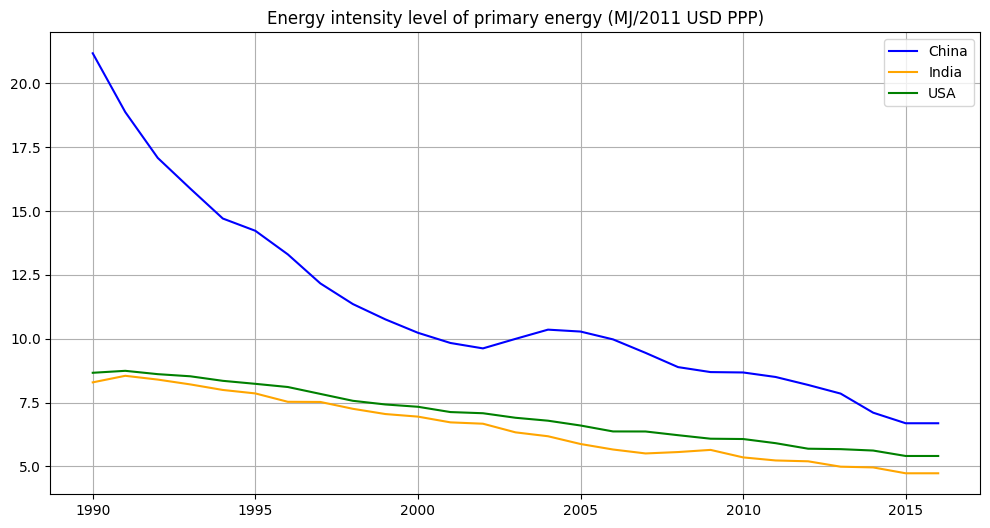

In [9]:
#Plot
plt.figure(figsize=(12,6))

plt.plot(yearsAsc,primEChAsc,label="China",color="blue")
plt.plot(yearsAsc,primEInAsc,label="India",color="orange")
plt.plot(yearsAsc,primEUsAsc,label="USA",color="green")

plt.legend()
plt.grid()

xvalues=np.arange(1990,2020,5)
plt.title("Energy intensity level of primary energy (MJ/2011 USD PPP)")

plt.xticks(xvalues)
plt.show()

## Forecast for energy intensity level of primary energy
---
Try out by typping a year in the next cell! <br><br>
In this case, I will use 2030 to answer the key question.

In [10]:
# Predictive model
ranYear2=input("Enter any year after 2016 but before 2052 to obtain a prediction ")
    
try:
    wish=int(ranYear2)
    if (wish>2016) & (wish<2053):
        print("Success",wish)
    else:
        print("It might be out of boundaries, try another!")
except ValueError:
    print(f"try a year again...!")

arimaYears = np.arange(lastYear, wish+1)
arimaFullYears = np.concatenate([yearsAsc, arimaYears])

Enter any year after 2016 but before 2052 to obtain a prediction  2030


Success 2030


In [11]:
#Y Values for series
def arimaPEnergy(y):
    
    modelArima = ARIMA(y, order=(1, 1, 1))
    modelFitArima = modelArima.fit()
    forecastArima = modelFitArima.forecast(steps=(wish-lastYear)+1)
    arimaFullPred = np.concatenate([y, forecastArima])

    #Wish year data
    predWish = forecastArima[-1]
    
    return arimaFullPred,predWish

In [12]:
#Series of each country and desired year data
for countryName in NRep:
    match countryName:
        case "China":
            arimaCHN,WC=arimaPEnergy(primEChAsc)
        case "India":
            arimaIND,WI=arimaPEnergy(primEInAsc)
        case "United States":
            arimaUSA,WU=arimaPEnergy(primEUsAsc)

In [13]:
print(WC,WI,WU)

7.464237600884238 2.8629647679856065 3.6585836118256796


In [14]:
print(arimaCHN,arimaIND,arimaUSA)

[21.17944283 18.87711071 17.08054666 15.87974562 14.70799587 14.22762923
 13.3030465  12.16643641 11.35795951 10.75796138 10.23305051  9.83358331
  9.62184206  9.99420998 10.35599738 10.28130878  9.97448941  9.44675565
  8.88879012  8.69387284  8.67917854  8.5023195   8.19029944  7.8513338
  7.10422     6.6900697   6.6900697   6.76653256  6.83846378  6.90613196
  6.96978973  7.02967477  7.08601069  7.13900782  7.18886403  7.23576548
  7.27988729  7.32139418  7.36044114  7.39717395  7.43172976  7.4642376 ] [8.29159791 8.54836655 8.40018853 8.21116168 7.99411301 7.8581603
 7.53016367 7.52418202 7.25603779 7.05054708 6.94959487 6.72480638
 6.67200102 6.33392173 6.18110787 5.87751947 5.66184905 5.5076493
 5.56214241 5.64671193 5.35317924 5.23298571 5.19964332 4.98862544
 4.9601495  4.73091045 4.73091045 4.60493008 4.47915843 4.35359517
 4.22823995 4.10309241 3.97815223 3.85341905 3.72889254 3.60457234
 3.48045812 3.35654954 3.23284625 3.10934792 2.98605421 2.86296477] [8.6665767  8.7434953

🔹 China 2030: 7.46 MJ/USD
🔹 India 2030: 2.86 MJ/USD
🔹 USA 2030: 3.66 MJ/USD


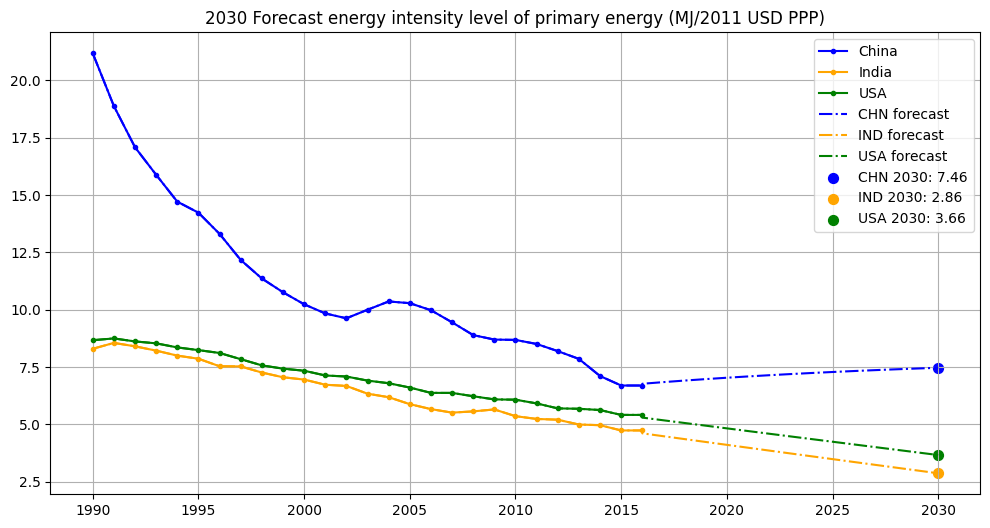

In [15]:
# Results
print(f"🔹 China {wish}: {WC:.2f} MJ/USD")
print(f"🔹 India {wish}: {WI:.2f} MJ/USD")
print(f"🔹 USA {wish}: {WU:.2f} MJ/USD")

#Plot
plt.figure(figsize=(12,6))

# Historic values
plt.plot(yearsAsc,primEChAsc,label="China",color="blue",marker='.')
plt.plot(yearsAsc,primEInAsc,label="India",color="orange",marker='.')
plt.plot(yearsAsc,primEUsAsc,label="USA",color="green",marker='.')

# Forecast
plt.plot(arimaFullYears, arimaCHN, label='CHN forecast',color="blue", linestyle='-.')
plt.plot(arimaFullYears, arimaIND, label='IND forecast',color="orange", linestyle='-.')
plt.plot(arimaFullYears, arimaUSA, label='USA forecast',color="green", linestyle='-.')

#  Mark desired year info
plt.scatter([wish], [WC], color='blue', s=50, label=f'CHN {wish}: {WC:.2f}')
plt.scatter([wish], [WI], color='orange', s=50, label=f'IND {wish}: {WI:.2f}')
plt.scatter([wish], [WU], color='green', s=50, label=f'USA {wish}: {WU:.2f}')

plt.title(f"{wish} Forecast energy intensity level of primary energy (MJ/2011 USD PPP)")

plt.legend()
plt.grid()
plt.show()


## Clean Fuels and Technologies for cooking analysis
---
Clean cooking fuels and technologies discourages the use of unprocessed coal due to harmful indoor air pollution. A clean technology uses electricity, natural gas, biogas, and solar energy as electric stoves, gas stoves, solar cookers or advanced cookstoves do. <br>

Try out by typping a year in the next cell! <br><br>
In this case, I will use 2008 to answer the key question.

In [16]:
# Random year by user
ranYear=input("Enter any year between 2000 and 2016: ")

try:
    number=int(ranYear)
    if (number>2000) & (number<2016):
        print("Success",ranYear)
    else:
        print("It might be out of boundaries, try another!")
except ValueError:
    print(f"try a year again")

Enter any year between 2000 and 2016:  2008


Success 2008


In [17]:
#Y values for series
def Cooking(yearCooking):
    
    lbACook="Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT]"
    heightCook=[]
    
    i=0
    for year in dfSE2["Time"]:
        if  (year == yearCooking):
            try:
                number=float(dfSE2.iloc[i][lbACook])
            except ValueError:
                number=0 
            heightCook.append(number)
        i=i+1

    return heightCook


In [18]:
#Y values for series
def Cooking(yearCooking):
    
    lbACook="Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT]"
    heightCook=[]
    
    i=0
    for year in dfSE2["Time"]:
        if  (year == yearCooking):
            try:
                number=float(dfSE2.iloc[i][lbACook])
            except ValueError:
                number=0 
            heightCook.append(number)
        i=i+1

    return heightCook


In [19]:
#Filtering years for series
for yearCooking in yearsAsc:
    if  (yearCooking == firstYear):
        heightFCook=Cooking(yearCooking)
        #No info for 10 years
        while all (x==0 for x in heightFCook):
            yearCooking=yearCooking+1
            heightFCook=Cooking(yearCooking)
        firstYear=yearCooking
        print(firstYear)
    elif (yearCooking == lastYear):
        heightLCook=Cooking(yearCooking)
    elif (int(yearCooking) == int(ranYear)):
        heightRCook=Cooking(yearCooking)
        
print(heightFCook,heightLCook,heightRCook)

2000
2000
[46.78, 22.15, 100.0] [59.26, 41.04, 100.0] [53.37, 32.06, 100.0]


In [20]:
#Filtering years for series
for yearCooking in yearsAsc:
    if  (yearCooking == firstYear):
        heightFCook=Cooking(yearCooking)
        #No info for 10 years
        while all (x==0 for x in heightFCook):
            yearCooking=yearCooking+1
            heightFCook=Cooking(yearCooking)
        firstYear=yearCooking
        print(firstYear)
    elif (yearCooking == lastYear):
        heightLCook=Cooking(yearCooking)
    elif (int(yearCooking) == int(ranYear)):
        heightRCook=Cooking(yearCooking)
        
print(heightFCook,heightLCook,heightRCook)

2000
[46.78, 22.15, 100.0] [59.26, 41.04, 100.0] [53.37, 32.06, 100.0]


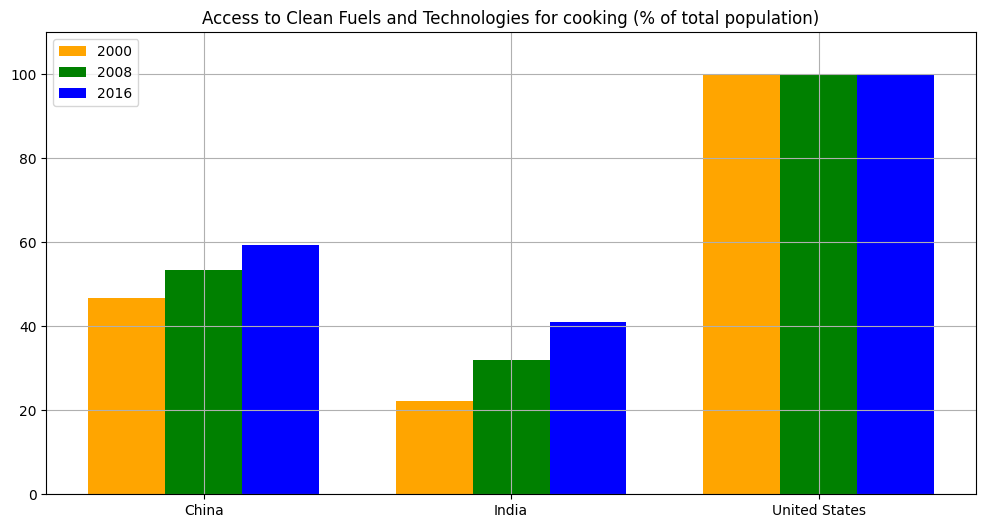

In [41]:
#Barplot
plt.figure(figsize=(12,6))
barWidth=0.25
plt.grid()
barIndex=np.arange(len(NRep))
plt.bar(barIndex,heightFCook,width=barWidth,label=firstYear,color="orange")
plt.bar(barIndex+barWidth,heightRCook,width=barWidth,label=ranYear,color="green")
plt.bar(barIndex+2*barWidth,heightLCook,width=barWidth,label=lastYear,color="blue")
plt.title("Access to Clean Fuels and Technologies for cooking (% of total population)")
plt.ylim(0,110)
plt.xticks(barIndex+barWidth,NRep)
plt.legend()
plt.show()

## Insights
---
1. **Improvement in energy efficiency:**<br>
From 1990 to 2015, the global primary energy intensity decreased, showing an improvement in energy efficiency. 
2. **India potential leader in 2030:**<br>
Though China's energy intensity has decreased dramatically and India as USA remains slow, India has growth potential for being leader in 2030.
3. **Macroeconomic process to focus:**<br>
To show an important advance, we need to focus on macroeconomic processes sectors instead of domestic access.